In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/aarsh/Downloads/rssi.csv',usecols=['ID','DateTime','A2_RSSI','Track'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30975729 entries, 0 to 30975728
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   DateTime  object 
 2   Track     int64  
 3   A2_RSSI   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 945.3+ MB


In [3]:
df['date'] = pd.to_datetime(df['DateTime'])
del df['DateTime']

In [4]:
df.head()

,ID,Track,A2_RSSI,date
0,1,1,2.09,2021-01-09 00:00:01
1,2,1,1.99,2021-01-09 00:00:02
2,3,1,2.05,2021-01-09 00:00:03
3,4,1,2.06,2021-01-09 00:00:04
4,5,1,1.75,2021-01-09 00:00:05


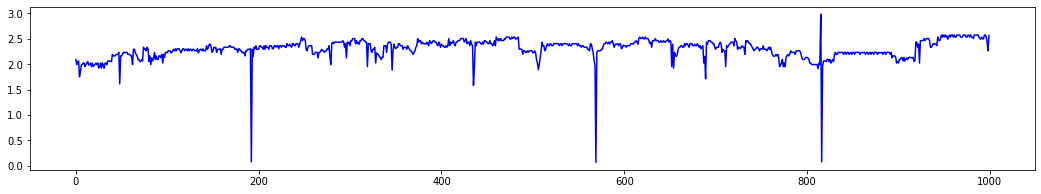

In [23]:
plt.figure(figsize=(18,3))
plt.plot(df['A2_RSSI'][:1000],color='blue')
plt.show()

In [24]:
rollmean = df[:1000].resample(rule='60S').mean()
rollstd =df[:1000].resample(rule='60S').std()

plt.plot(df['A2_RSSI'][:1000],color='blue',label='Original')
plt.plot(rollmean['A2_RSSI'],color='red',label='Rolling Mean')
plt.plot(rollstd['A2_RSSI'],color='black',label='Rolling Std')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'